# ML_SP22_Project_3 (CNN)

### Due Date: 5/16 23:59 pm

In [1]:
import sys
import os
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image

### The goal for this Project is to practice running CNN using a set of dog and cat image

***Make sure you fill in the blank inside the TODO section and try at least two different choices for the following parameters. Summarize your findings briefly at the end of the notebook***

1. Define a first model, try two epoch choices and two batch size.
2. Add dropout to the first model to see if it helps or not, pick one of the epoch and batch size you had before
3. Try a second model with slighly different model arhitecture
4. Summarize your findings

### Loading the datasets

In [3]:
# download the dogsvscats.zip, save it under your notebook directory
# or somewhere else, change base_dir to where you save the datasets
base_dir = "./dogsvscats"

In [4]:
train_dataset = image_dataset_from_directory(
         os.path.join(base_dir, "train"),
        image_size=(180, 180),
        batch_size=32)

Found 2000 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "validation"),
        image_size=(180, 180),
        batch_size=32)

Found 1000 files belonging to 2 classes.


In [6]:
test_dataset = image_dataset_from_directory(
        os.path.join(base_dir, "test"),
        image_size=(180, 180),
        batch_size=1000)

Found 1000 files belonging to 2 classes.


In [7]:
images, labels = list(train_dataset.take(1))[0]
class_names = train_dataset.class_names

Text(0.5, 1.0, 'dog')

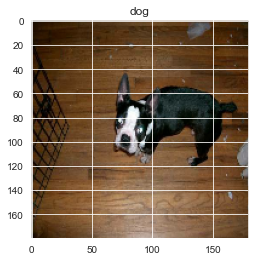

In [8]:
idx = 2
plt.imshow(images[idx].numpy().astype("uint8"))
plt.title(class_names[labels[idx].numpy()])

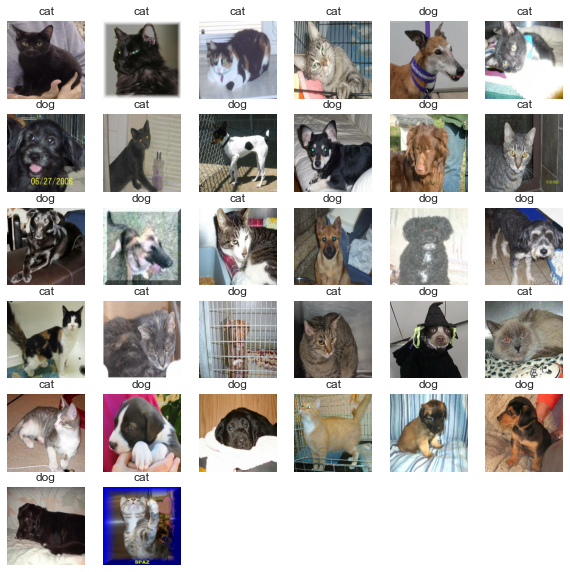

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

# Plotting the images
plt.show()

### Define your first CNN model

In [31]:
# TODO: fill in the blank
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)
#...
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
# ....
x = layers.Flatten()(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

### Comiple the model

In [32]:
# TODO: fill in the blank
model.compile(loss="binary_crossentropy", optimizer = "rmsprop", metrics=["accuracy"])
#              ....
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

### Running the first model

In [ ]:
# increase epochs
history = model.fit(
    train_dataset,
    epochs=20, 
    validation_data=validation_dataset)

Epoch 1/20
42/63 [===================>..........] - ETA: 27s - loss: 0.7832 - accuracy: 0.5082

### Now, look at the testing dataset

In [ ]:
test_images, test_labels = list(test_dataset.take(1))[0]

In [ ]:
class_names

***Predict one image at a time***

In [ ]:
idx = 50
plt.imshow(test_images[idx].numpy().astype("uint8"))
plt.title(class_names[test_labels[idx].numpy()])

In [ ]:
img = test_images[idx]
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [ ]:
print(img_array.shape)
print(img_batch.shape)

In [ ]:
prediction = model.predict(img_batch)

In [ ]:
print(prediction)

### Evaluate your first model out-of-sample

In [ ]:
# TODO fill-in the blank here


### Try different choices of epoch, batch size for your first model

In [ ]:
# Type your code here

### Try a second model with slightly different architecture (no need to be very complicated)

In [ ]:
# Type your code here
#

In [ ]:
# TODO test your second model on out-of-sample data

### Summarize your findings below

In [ ]:
# Type your answers and comments here